<a href="https://colab.research.google.com/github/juanandres-montero/macroeconometria/blob/main/Laboratorio_08_Arch_y_Garch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://github.com/juanandres-montero/macroeconometria/blob/main/logo%20EEC%20grande.png?raw=1" width="396" height="161"><br>
    <b style="font-size:200%">EC4301 MACROECONOMETRÍA</b><br>
    <b style="font-size:100%">Asistente: Juan Andrés Montero</b><br><br>
    <b style="font-size:100%"> Laboratorio #8:</b>
    <br>    
    <div style="font-size:150%; color:white; background-color: #0064b0; padding-top: 20px; padding-bottom: 20px; width: 50%; margin: 0 auto; border-radius: 15px; text-align: center;">
        Modelos ARCH y GARCH
    </div>
</center>

<br>

<i style="font-size:80%">
    Creado: Junio 2024 <br>
    Actualizado: Octubre 2024
</i>

<hr>

  * ARCH se enfoca en modelar la volatilidad condicional como una función lineal de los errores cuadráticos rezagados.
  
  * GARCH extiende ARCH al incluir términos autoregresivos en la ecuación de varianza condicional, lo que permite una modelización más flexible y general de la volatilidad.

# Ejemplo: Acciones de Mastercard Inc.

In [ ]:
!pip install yfinance -q

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

tickerSymbol = 'MA'
tickerData = yf.Ticker(tickerSymbol)

tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2024-1-1')
tickerDf['Daily Return'] = tickerDf['Close'].pct_change()
#tickerDf['Daily Return'] = np.log(tickerDf['Close'] / tickerDf['Close'].shift(1))
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return
Date,,,,,,,,
2015-01-02 00:00:00-05:00,86.680000,87.360001,84.919998,85.680000,4505800,0.0,0.0,NaN
2015-01-05 00:00:00-05:00,85.290001,85.349998,83.050003,83.269997,6441400,0.0,0.0,-0.028128
2015-01-06 00:00:00-05:00,83.660004,83.779999,81.800003,83.089996,7690000,0.0,0.0,-0.002162
2015-01-07 00:00:00-05:00,84.099998,84.279999,83.070000,84.220001,5846800,0.0,0.0,0.013600
2015-01-08 00:00:00-05:00,85.190002,85.620003,85.029999,85.529999,5174200,0.0,0.0,0.015554


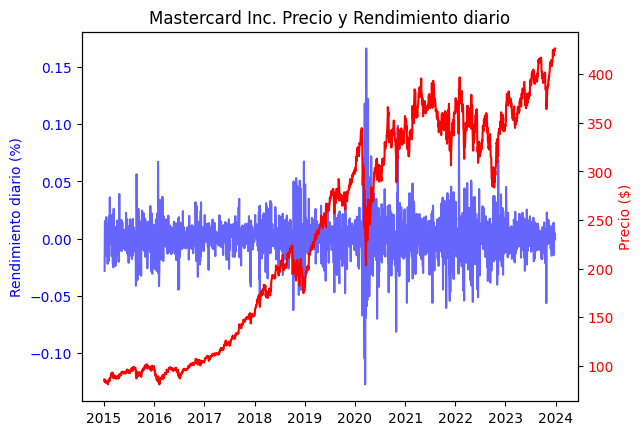

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
color = 'blue'
ax1.set_ylabel('Rendimiento diario (%)', color=color)
ax1.plot(tickerDf['Daily Return'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()

color = 'red'
ax2.set_xlabel('Date')
ax2.set_ylabel('Precio ($)', color=color)
ax2.plot(tickerDf['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Mastercard Inc. Precio y Rendimiento diario')
plt.show()

In [ ]:
rendimientos = tickerDf['Daily Return'].dropna()
rendimientos.head()

Date
2015-01-05 00:00:00-05:00   -0.028128
2015-01-06 00:00:00-05:00   -0.002162
2015-01-07 00:00:00-05:00    0.013600
2015-01-08 00:00:00-05:00    0.015554
2015-01-09 00:00:00-05:00   -0.012744
Name: Daily Return, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(rendimientos)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Interpretar los resultados
if result[1] <= 0.05:
    print('La serie parece ser estacionaria (rechazamos la hipótesis nula de no estacionariedad).')
else:
    print('La serie parece no ser estacionaria (no podemos rechazar la hipótesis nula de no estacionariedad).')

ADF Statistic: -12.916757182278923
p-value: 3.951171773984679e-24
Critical Values:
	1%: -3.4332635674843694
	5%: -2.8628271349445633
	10%: -2.5674552025417263
La serie parece ser estacionaria (rechazamos la hipótesis nula de no estacionariedad).


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
best_aic = float("inf")
best_order = None
best_model = None
warnings.filterwarnings("ignore")
for p in range(5):
        for q in range(5):
            try:
                model = ARIMA(rendimientos, order=(p, 1, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, 1, q)
                    best_model = results
            except:
                continue

print(f"Mejor modelo ARIMA: ARIMA{best_order} - AIC: {best_aic}")
print(best_model.summary())
bestarima = best_model


Mejor modelo ARIMA: ARIMA(4, 1, 3) - AIC: -11944.413944665166
                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 2263
Model:                 ARIMA(4, 1, 3)   Log Likelihood                5980.207
Date:                Tue, 25 Jun 2024   AIC                         -11944.414
Time:                        11:28:28   BIC                         -11898.622
Sample:                             0   HQIC                        -11927.705
                               - 2263                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7158      0.060    -28.508      0.000      -1.834      -1.598
ar.L2         -0.8956      0.066    -13.475      0.000      -1.026   

# Mejor modelo ARIMA: ARIMA(4, 1, 3)

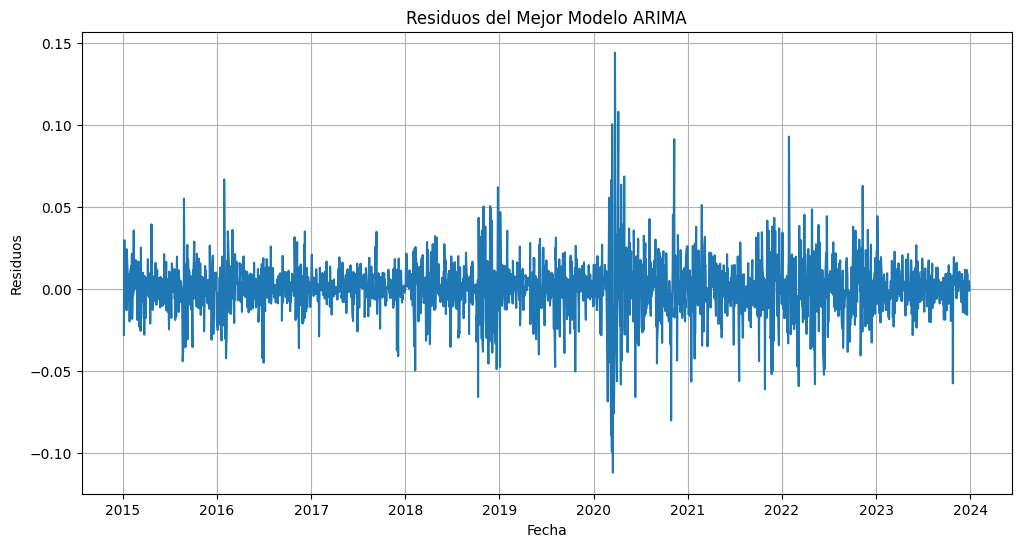

In [ ]:
# Diagnóstico de residuos del mejor modelo
residuals = best_model.resid
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuos del Mejor Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.stats.diagnostic import het_arch

lb_test = het_arch(residuals)
print("Estadístico de prueba Ljung-Box:", lb_test[0])
print("Valor p:", lb_test[1])

Estadístico de prueba Ljung-Box: 567.4742335030462
Valor p: 1.6297960623666902e-115


# ARCH(1)

In [ ]:
!pip install arch -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 7.8 MB/s eta 0:00:00


In [ ]:
from arch import arch_model
arch_model = arch_model(residuals, vol='ARCH', p=1)
arch_fit = arch_model.fit()
print(arch_fit.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 9480894131.313822
Iteration:      2,   Func. Count:     17,   Neg. LLF: 18812847.243608624
Iteration:      3,   Func. Count:     23,   Neg. LLF: -5192.589017544449
Iteration:      4,   Func. Count:     29,   Neg. LLF: 38540078.12504263
Iteration:      5,   Func. Count:     40,   Neg. LLF: -4319.011969032383
Iteration:      6,   Func. Count:     48,   Neg. LLF: -6017.376896102369
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5219.797663903817
Iteration:      8,   Func. Count:     62,   Neg. LLF: -6114.061865330101
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6114.0618653302445
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 8
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squa

# Encontrar ARCH/GARCH.
Elige GARCH(1,1)

In [ ]:
from arch import arch_model

model = arch_model(residuals)
results = model.fit()

print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5268389796.46965
Iteration:      2,   Func. Count:     19,   Neg. LLF: 249619138.8894216
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6337.553759973098
            Iterations: 2
            Function evaluations: 28
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6337.55
Distribution:                  Normal   AIC:                          -12667.1
Method:            Maximum Likelihood   BIC:                          -12644.2
                                        No. Observations:                 2263
Date:                Tue, Jun 25 2024   Df Residuals:                     2262
Time:            

In [ ]:
from arch import arch_model

best_model = None
best_aic = float('inf')
for t in ['ARCH', 'GARCH']:
  for p in range(3):
      for q in range(3):
        try:
            model = arch_model(residuals, vol=t, p=p, q=q)
            model_fit = model.fit(disp='off')
            current_aic = model_fit.aic

            if current_aic < best_aic:
                best_aic = current_aic
                best_model = model_fit
                best_p = p
                best_q = q

        except:
            continue
print("Mejor modelo GARCH({},{}) encontrado:".format(best_p, best_q))
print(best_model.summary())

Mejor modelo GARCH(1,1) encontrado:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6337.55
Distribution:                  Normal   AIC:                          -12667.1
Method:            Maximum Likelihood   BIC:                          -12644.2
                                        No. Observations:                 2263
Date:                Tue, Jun 25 2024   Df Residuals:                     2262
Time:                        11:30:27   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.5957e-04 

In [ ]:
import pandas as pd
residuals_df = residuals
residuals_df.to_csv('residuals.csv', index=False)

# En R

In [ ]:
install.packages("rugarch")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rugarch)

In [ ]:
spec <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1, 1)),
  mean.model = list(armaOrder = c(4, 3), include.mean = TRUE),
  distribution.model = "norm"
)

In [ ]:
data <- read.csv("/content/residuals.csv")

In [ ]:
fit <- ugarchfit(spec = spec, data = data)

summary(fit)

   Length     Class      Mode 
        1 uGARCHfit        S4 

In [ ]:
coeficientes <- coef(fit)
print(coeficientes)

           mu           ar1           ar2           ar3           ar4 
 5.480677e-04  1.094661e+00 -1.311701e+00  7.571563e-01 -5.882477e-02 
          ma1           ma2           ma3         omega        alpha1 
-1.107432e+00  1.272863e+00 -7.584349e-01  9.326742e-06  1.486708e-01 
        beta1 
 8.202944e-01 



please wait...calculating quantiles...


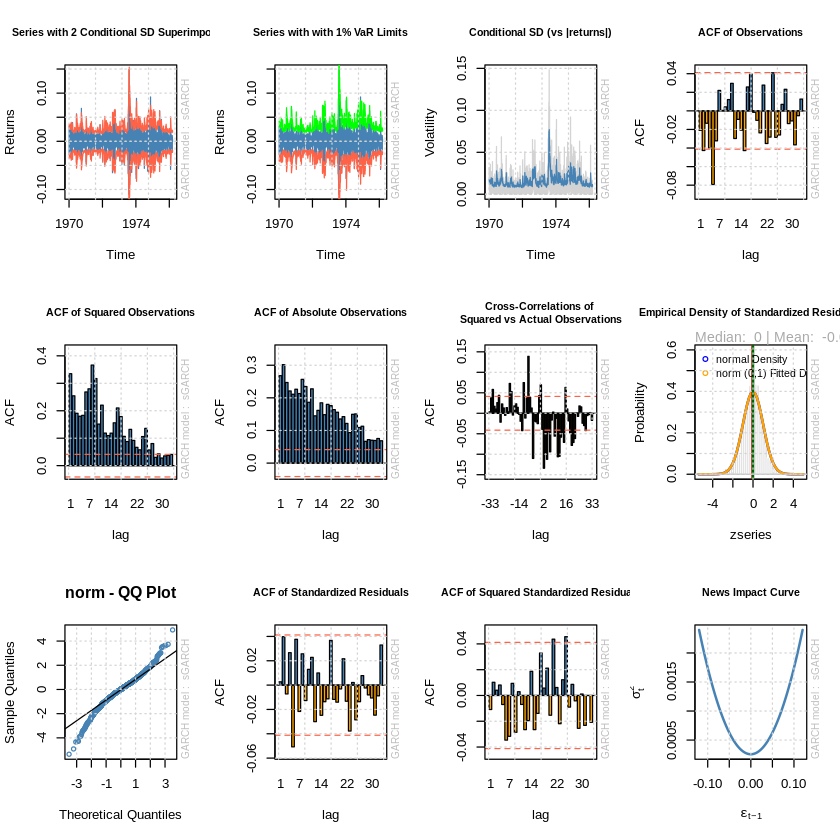

In [ ]:
# Diagnóstico de residuos
plot(fit, which = "all")


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=1976-03-13]:
         Series    Sigma
T+1   0.0008497 0.009242
T+2   0.0013892 0.009596
T+3   0.0003171 0.009927
T+4  -0.0005058 0.010238
T+5   0.0003165 0.010531
T+6   0.0014526 0.010806
T+7   0.0010576 0.011067
T+8  -0.0001940 0.011314
T+9  -0.0002341 0.011548
T+10  0.0009979 0.011771




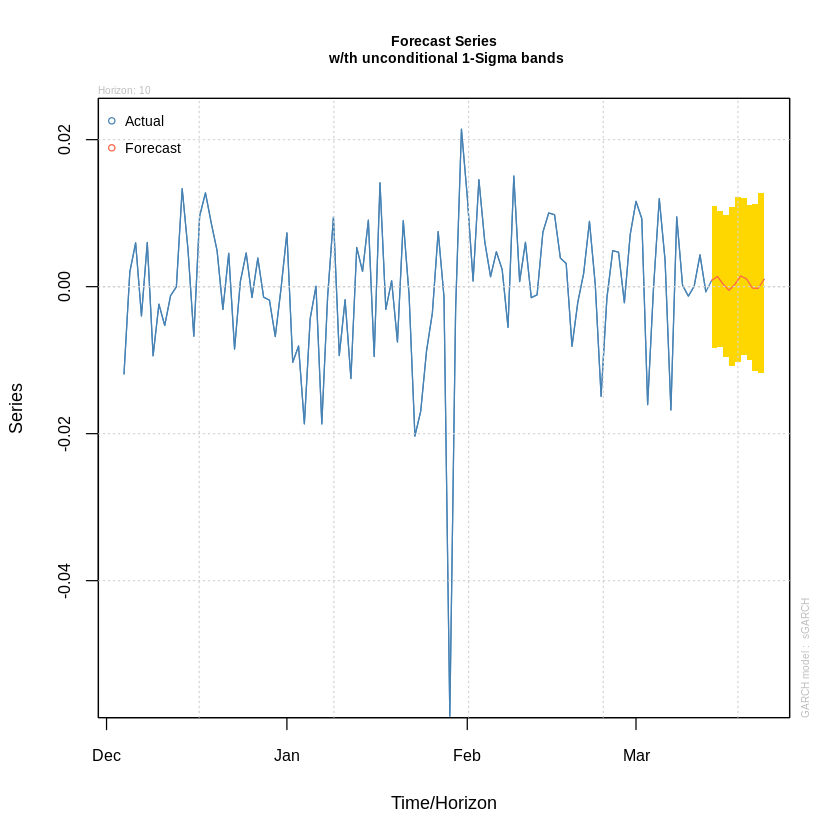

In [ ]:
# Generar pronósticos
forecast <- ugarchforecast(fit, n.ahead = 10)
print(forecast)
# Plot the forecasted conditional mean
plot(forecast, which = 1)

### ARIMA(4,1,3)

$$
\Delta Y_t = \mu + \phi_1 \Delta Y_{t-1} + \phi_2 \Delta Y_{t-2} + \phi_3 \Delta Y_{t-3} + \phi_4 \Delta Y_{t-4} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \theta_3 \epsilon_{t-3} + \epsilon_t
$$

$$
\Delta Y_t = 4.748857 \times 10^{-4} + 1.373044 \Delta Y_{t-1} - 1.328788 \Delta Y_{t-2} + 0.874045 \Delta Y_{t-3} - 0.003301 \Delta Y_{t-4} - 1.390854 \epsilon_{t-1} + 1.349818 \epsilon_{t-2} - 0.912313 \epsilon_{t-3} + \epsilon_t
$$


### Fórmula de la Varianza GARCH(1,1)

$$
\sigma_t^2 = \omega + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2
$$


$$
\sigma_t^2 = 9.049056 \times 10^{-6} + 0.147181 \epsilon_{t-1}^2 + 0.825558 \sigma_{t-1}^2
$$


Fuente del paquete de R: [Introduction to the rugarch package](https://cran.r-project.org/web/packages/rugarch/vignettes/Introduction_to_the_rugarch_package.pdf)


**Simularemos más ejemplos en Stata**

<a href="https://colab.research.google.com/github/juanandres-montero/macroeconometria/blob/main/Laboratorio_09_Cambio_Estructural.ipynb">Siguiente laboratorio>>></a>